In [1]:
!pip install seaborn
!pip install klib
!pip install scikit-learn
!pip install notebook

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import klib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib

In [3]:
sns.set()

In [4]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
def data_split(df):
    train_set, test_set = train_test_split(df, test_size=0.33, random_state=42)
    return train_set, test_set

In [8]:
titanic_train, titanic_test = data_split(titanic)
titanic_train = titanic_train.copy()
titanic_test = titanic_test.copy()

In [9]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Survived     596 non-null    int64  
 2   Pclass       596 non-null    int64  
 3   Name         596 non-null    object 
 4   Sex          596 non-null    object 
 5   Age          478 non-null    float64
 6   SibSp        596 non-null    int64  
 7   Parch        596 non-null    int64  
 8   Ticket       596 non-null    object 
 9   Fare         596 non-null    float64
 10  Cabin        134 non-null    object 
 11  Embarked     595 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 60.5+ KB


In [10]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            118
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          462
Embarked         1
dtype: int64

In [11]:
titanic_train.shape

(596, 12)

In [12]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

GridSpec(6, 6)

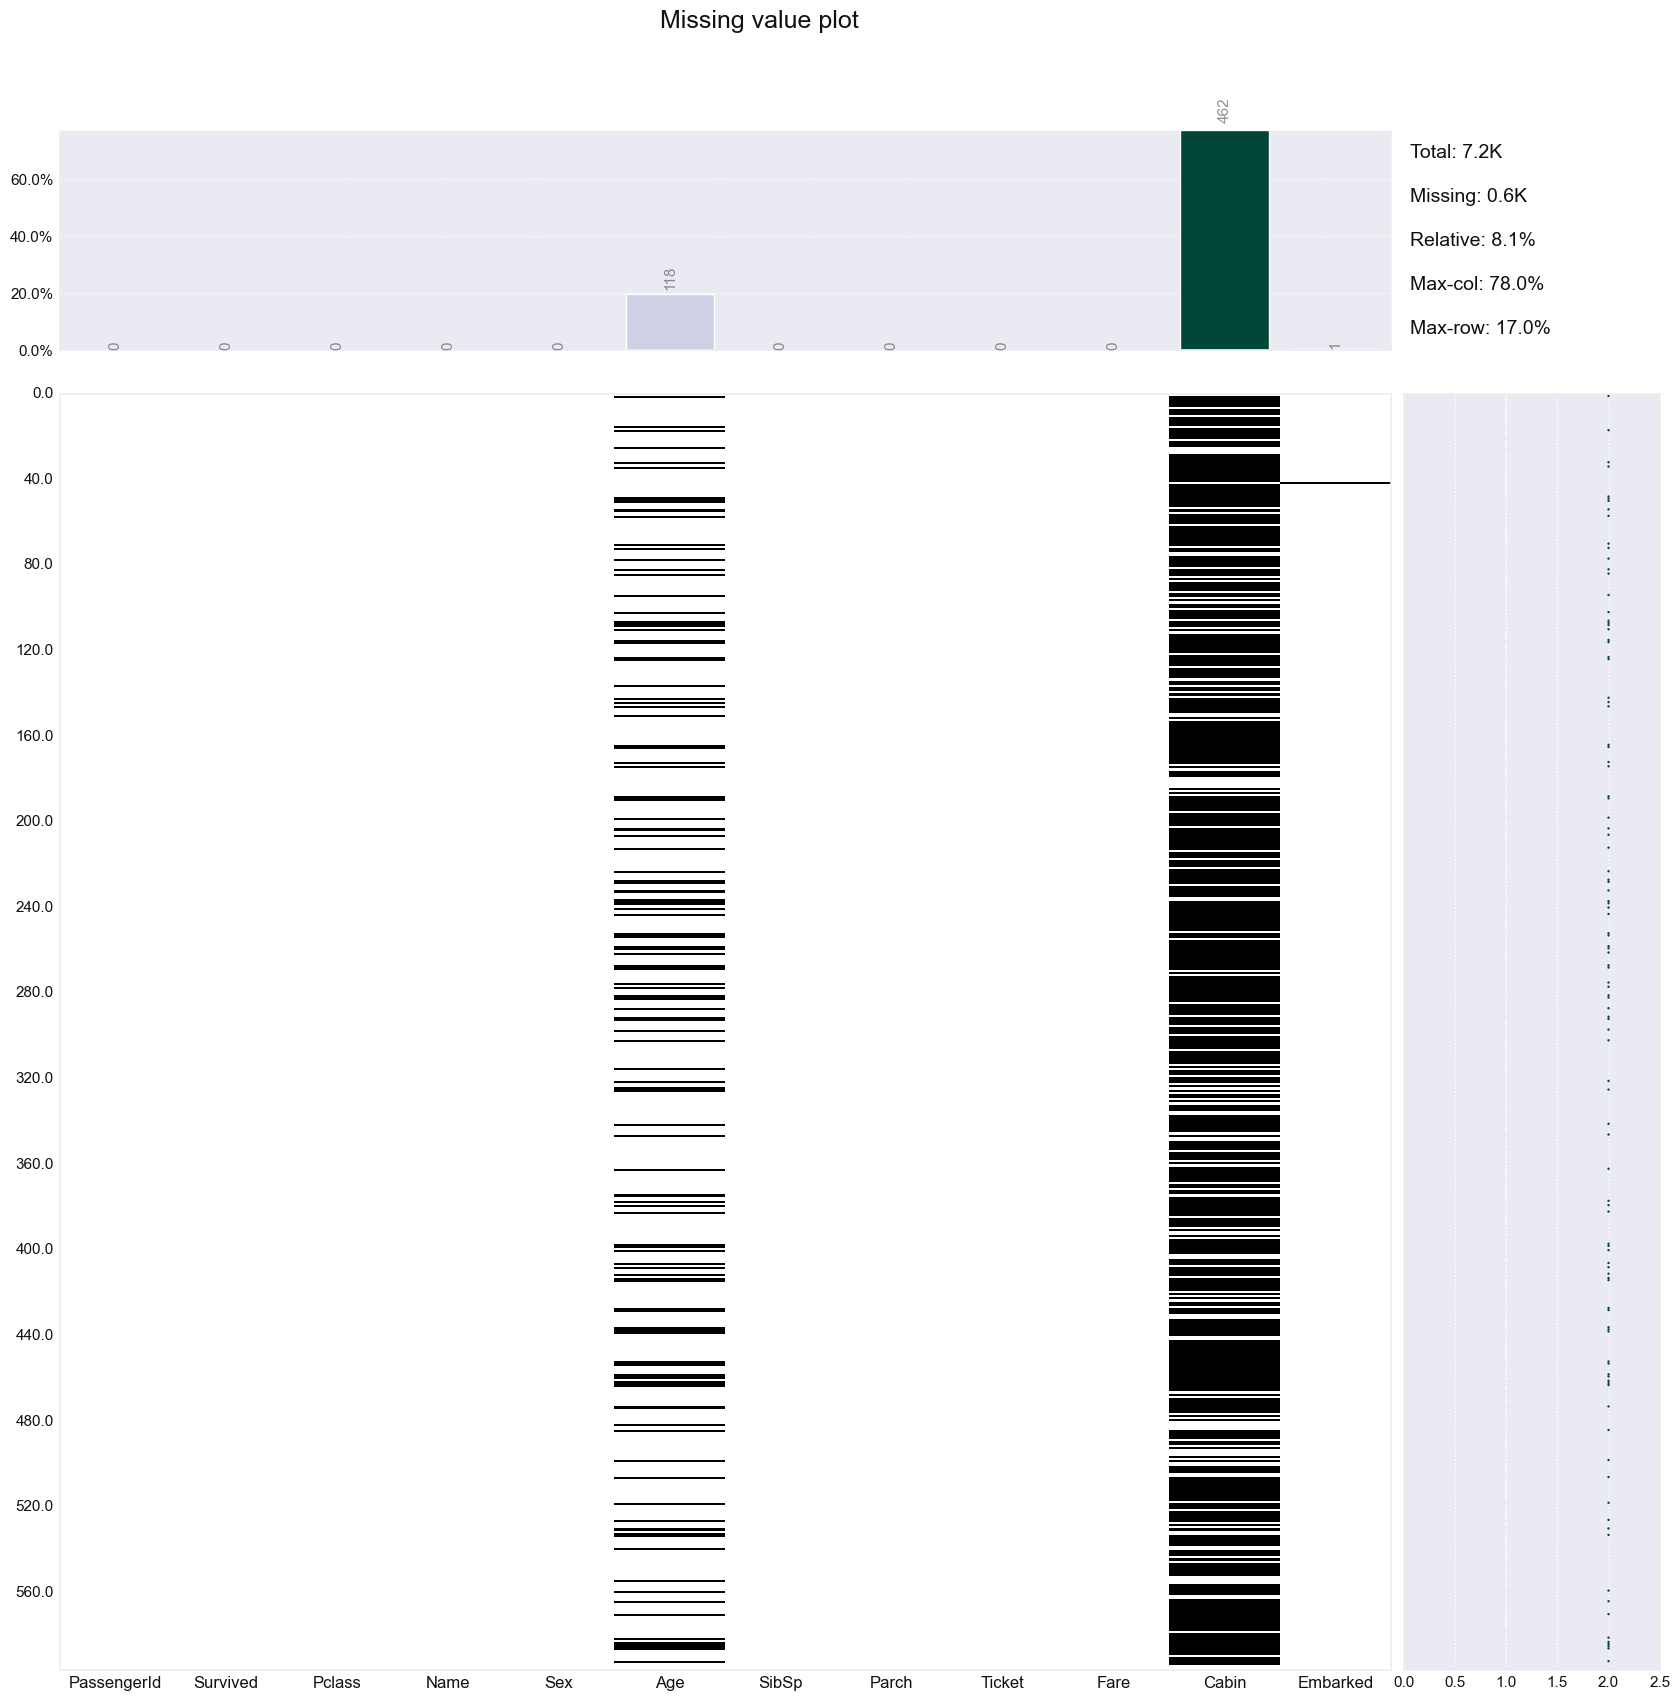

In [13]:
klib.missingval_plot(titanic_train)

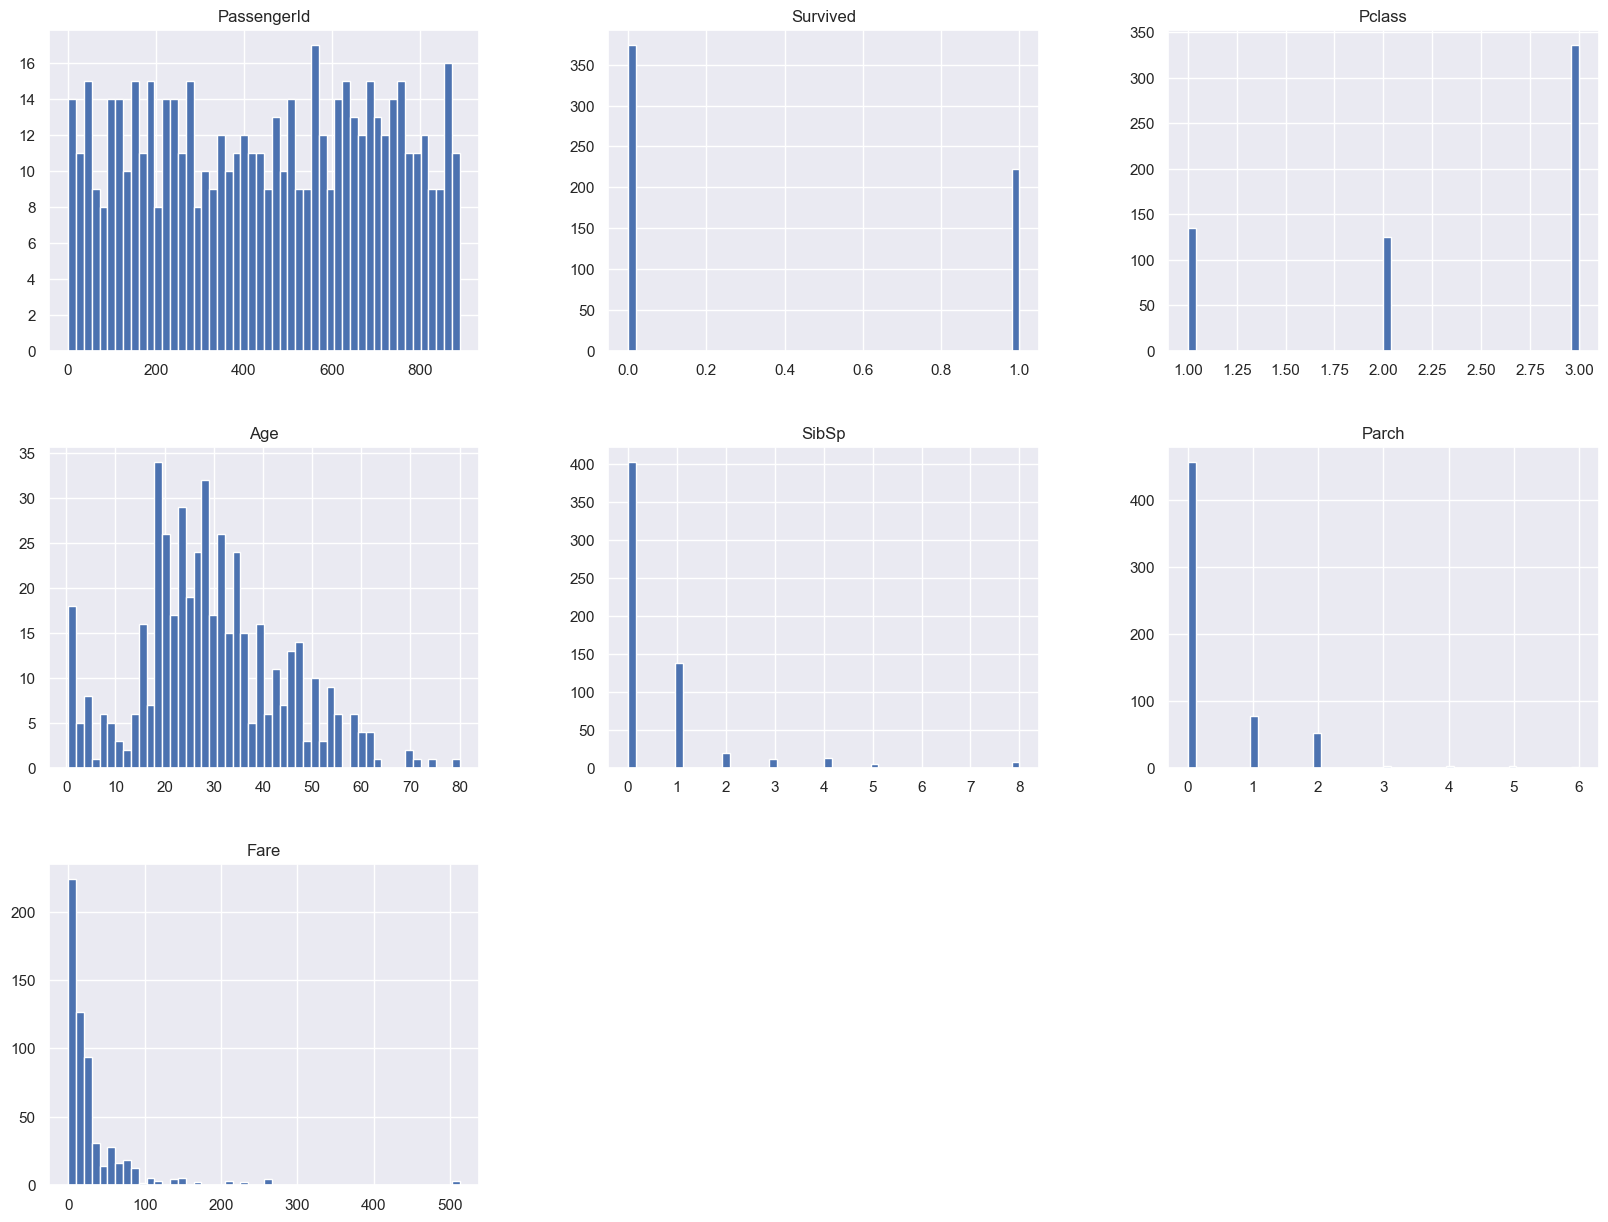

In [14]:
titanic_train.hist(bins=50, figsize=(20,15))
plt.show()

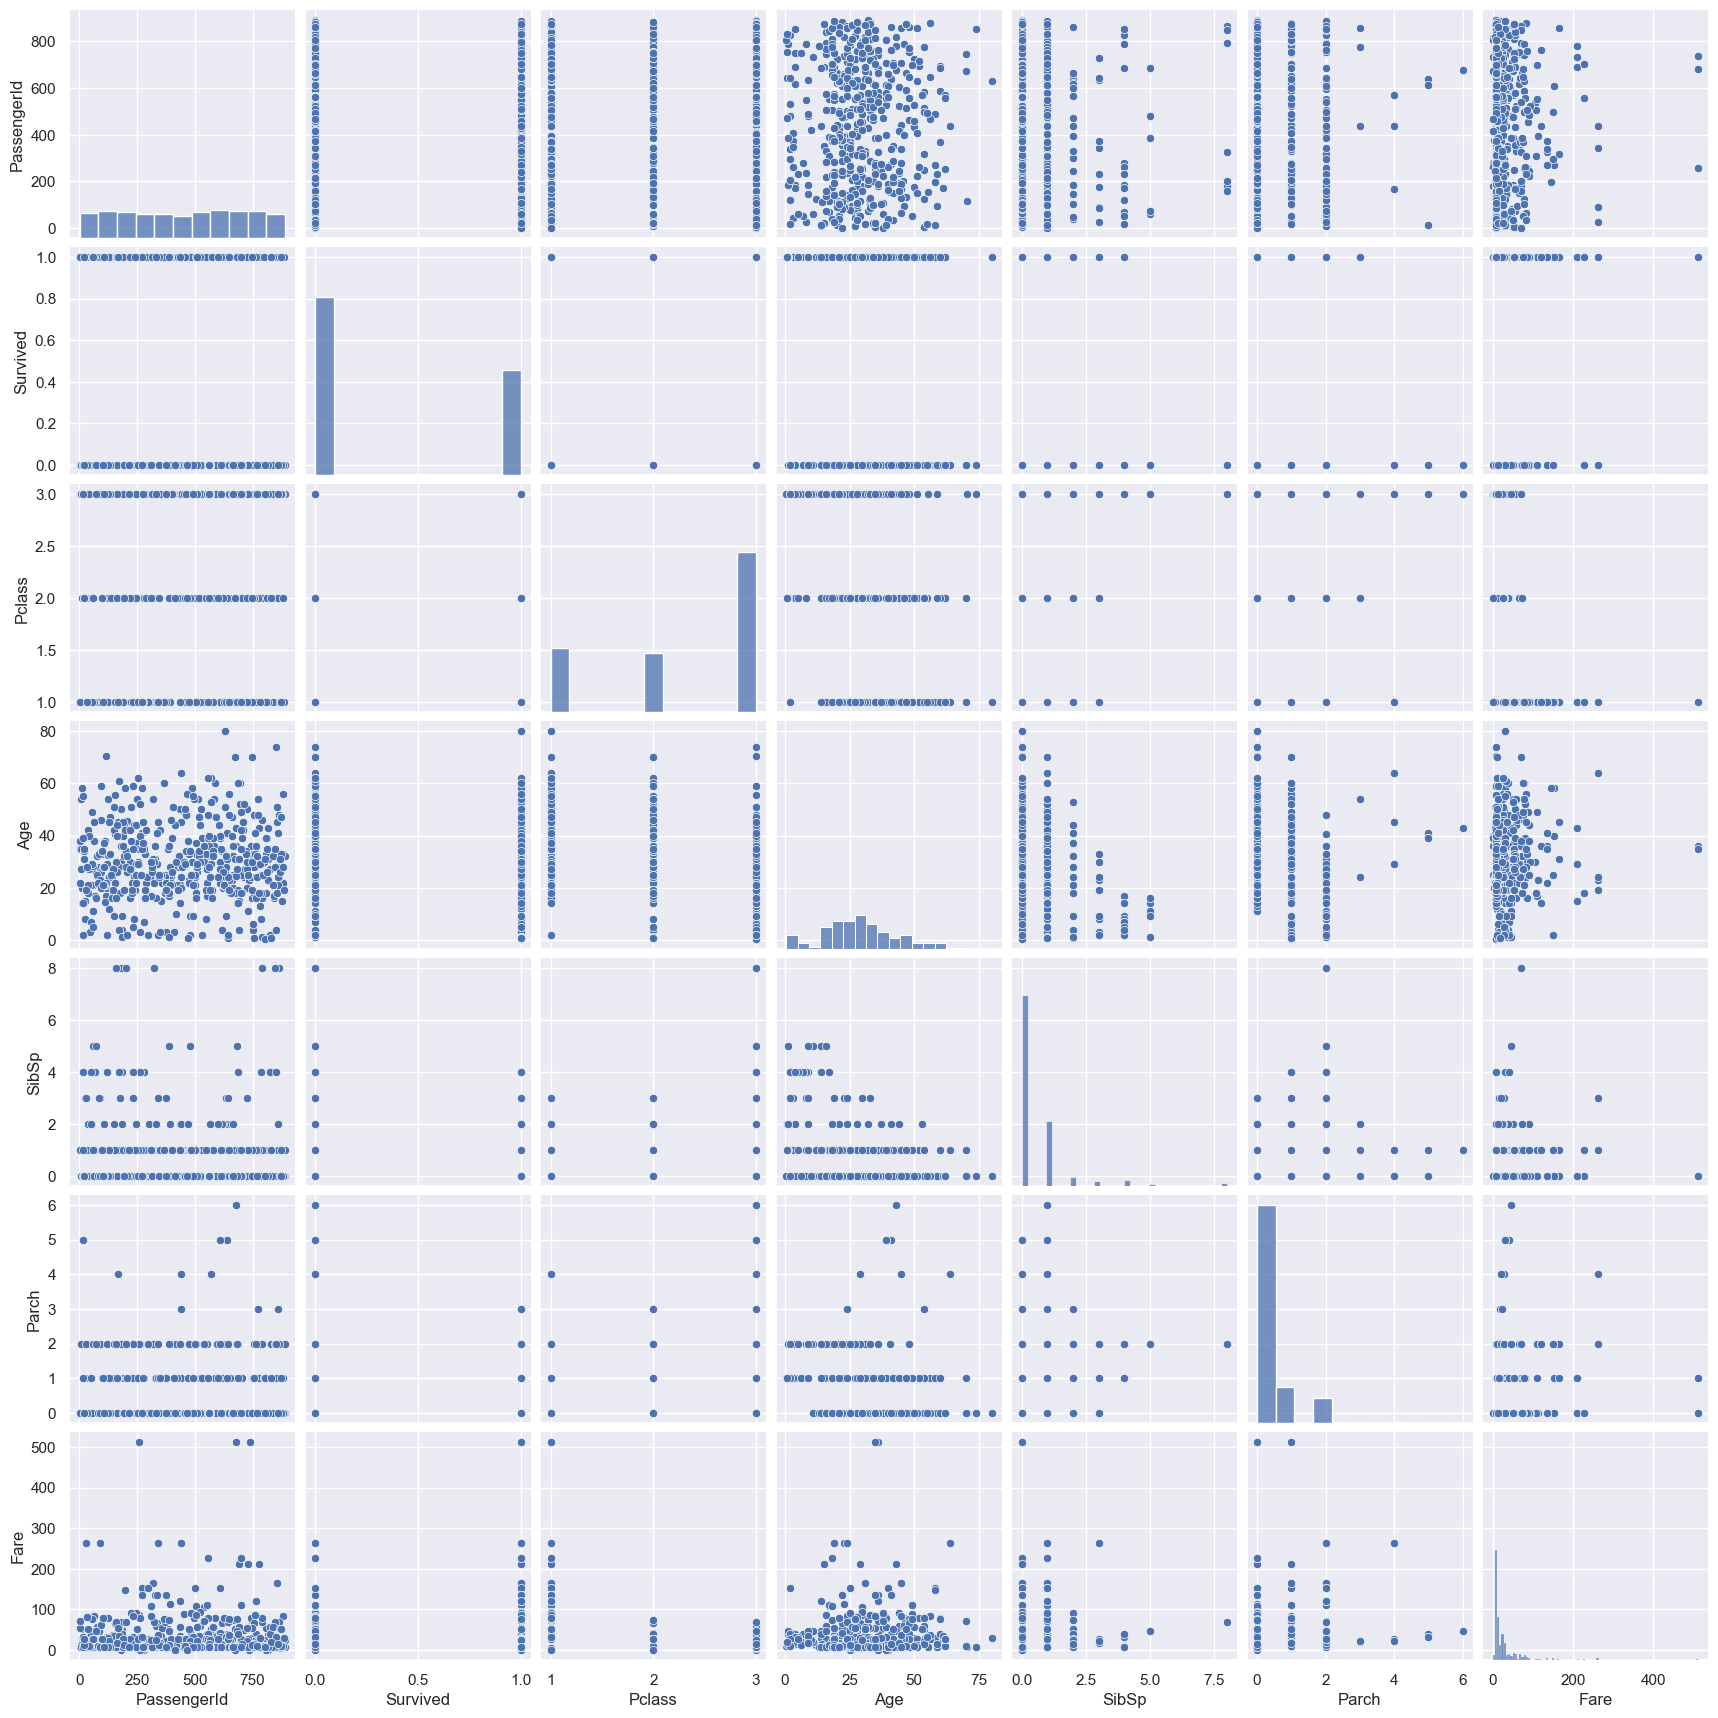

In [15]:
sns.pairplot(titanic_train)

In [16]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# titanic_train.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
# titanic_train

In [18]:
total_males = titanic_train.groupby('Sex').count()['Survived']['male']
total_females = titanic_train.groupby('Sex').count()['Survived']['female']

print('Total Number of Males : ', total_males)
print('Total Number of Females : ', total_females)

total_males_survived = titanic_train.groupby('Sex').sum()['Survived']['male']
total_females_survived = titanic_train.groupby('Sex').sum()['Survived']['female']

print('Total Number of Males Survived : ', total_males_survived)
print('Total Number of Females Survived : ', total_females_survived)

percent_of_survived_males = (total_males_survived / total_males) * 100
percent_of_survived_females = (total_females_survived / total_females) * 100

print('Percentage of Survived Males : {:.2f}%'.format(percent_of_survived_males))
print('Percentage of Survived Females : {:.2f}%'.format(percent_of_survived_females))

Total Number of Males :  390
Total Number of Females :  206
Total Number of Males Survived :  73
Total Number of Females Survived :  149
Percentage of Survived Males : 18.72%
Percentage of Survived Females : 72.33%


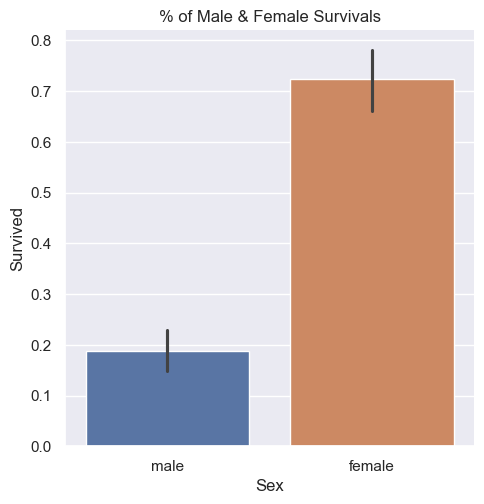

In [19]:
sns.catplot(data=titanic_train, x='Sex', y='Survived', hue='Sex', kind='bar').set(title='% of Male & Female Survivals')
plt.show()

In [20]:
total_class_1_passenger = titanic_train.groupby('Pclass').count()['Survived'][1]
total_class_2_passenger = titanic_train.groupby('Pclass').count()['Survived'][2]
total_class_3_passenger = titanic_train.groupby('Pclass').count()['Survived'][3]

print('Total Number of Class 1 Passenger : ', total_class_1_passenger)
print('Total Number of Class 2 Passenger : ', total_class_2_passenger)
print('Total Number of Class 3 Passenger : ', total_class_3_passenger)

total_class1_survived = titanic_train.groupby('Pclass').sum()['Survived'][1]
total_class2_survived = titanic_train.groupby('Pclass').sum()['Survived'][2]
total_class3_survived = titanic_train.groupby('Pclass').sum()['Survived'][3]

print('Total Number of Class 1 Passenger Survived : ', total_class1_survived)
print('Total Number of Class 2 Passenger Survived : ', total_class2_survived)
print('Total Number of Class 3 Passenger Survived : ', total_class3_survived)

percent_of_class1_survived = (total_class1_survived / total_class_1_passenger) * 100
percent_of_class2_survived = (total_class2_survived / total_class_2_passenger) * 100
percent_of_class3_survived = (total_class3_survived / total_class_3_passenger) * 100

print('Percentage of Class 1 Passenger Survived : {:.2f}%'.format(percent_of_class1_survived))
print('Percentage of Class 2 Passenger Survived : {:.2f}%'.format(percent_of_class2_survived))
print('Percentage of Class 3 Passenger Survived : {:.2f}%'.format(percent_of_class3_survived))

Total Number of Class 1 Passenger :  135
Total Number of Class 2 Passenger :  125
Total Number of Class 3 Passenger :  336
Total Number of Class 1 Passenger Survived :  80
Total Number of Class 2 Passenger Survived :  61
Total Number of Class 3 Passenger Survived :  81
Percentage of Class 1 Passenger Survived : 59.26%
Percentage of Class 2 Passenger Survived : 48.80%
Percentage of Class 3 Passenger Survived : 24.11%


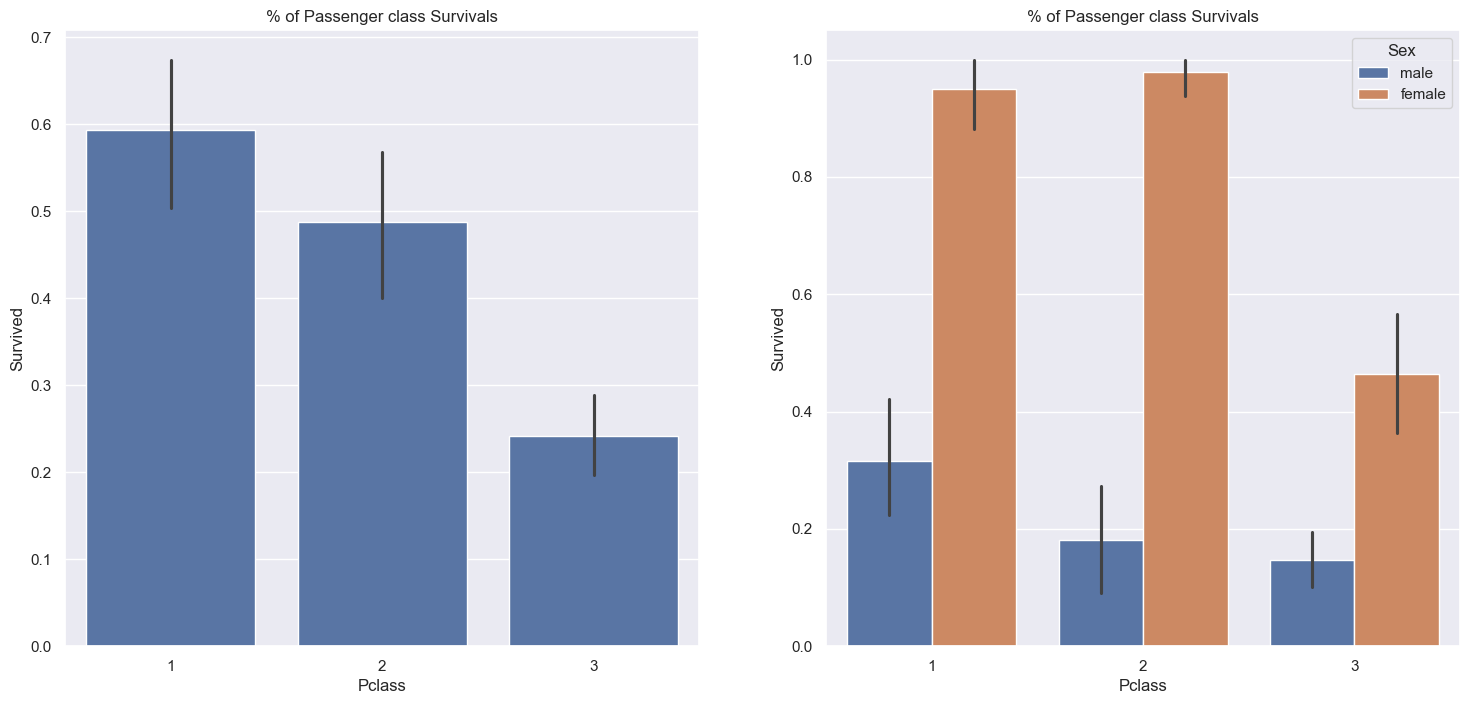

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(data=titanic_train, x='Pclass', y='Survived', ax=axes[0]).set(title='% of Passenger class Survivals')
sns.barplot(data=titanic_train, x='Pclass', y='Survived', hue='Sex', ax=axes[1]).set(title='% of Passenger class Survivals')
plt.show()

In [22]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
titanic_train['Age'].dtype

dtype('float64')

In [24]:
titanic_train['age_category'] = pd.cut(titanic_train['Age'], bins=[0, 18, 30, 60, 100, np.inf]) 
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(30.0, 60.0]"
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,NaN
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,"(18.0, 30.0]"
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,"(18.0, 30.0]"
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,"(18.0, 30.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,"(18.0, 30.0]"
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,"(30.0, 60.0]"
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,"(0.0, 18.0]"


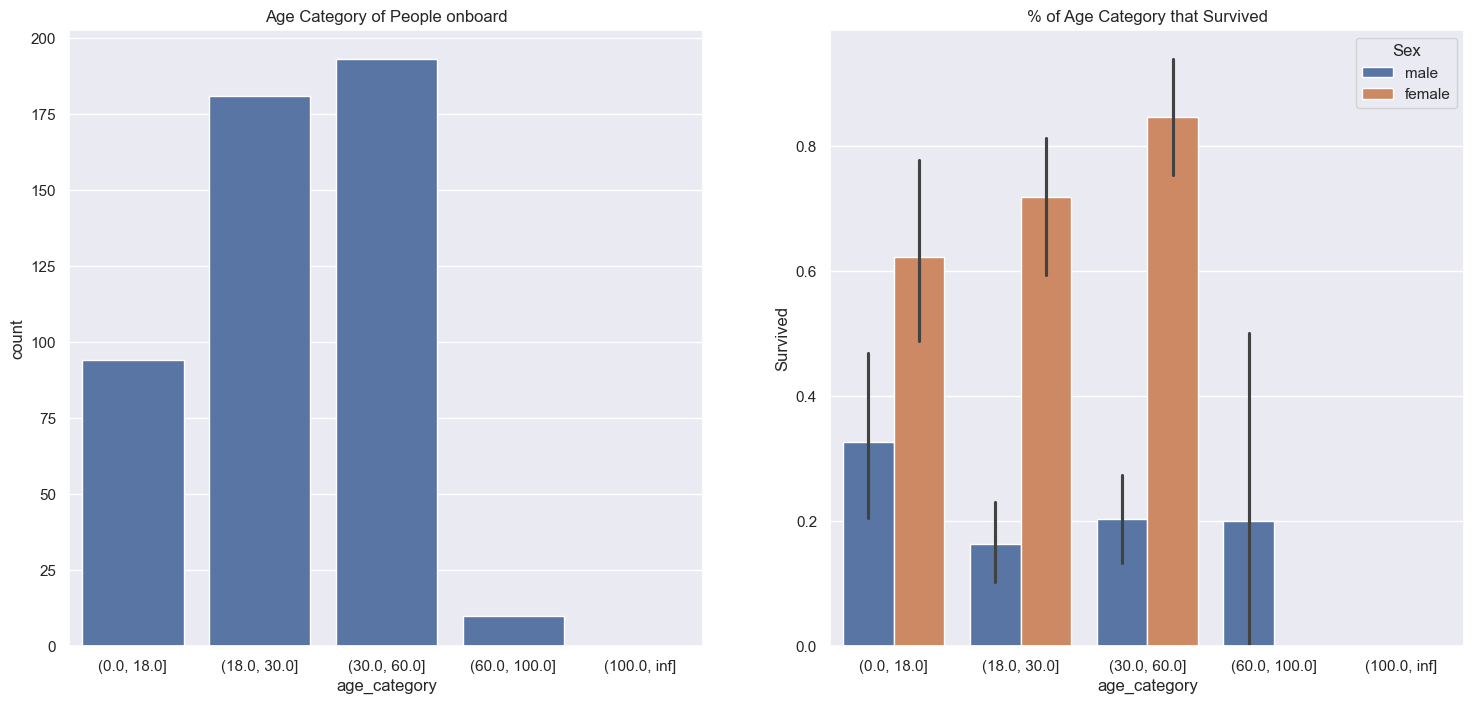

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='age_category', data=titanic_train, ax=axes[0]).set(title='Age Category of People onboard')
sns.barplot(x='age_category', y='Survived', hue='Sex', data=titanic_train,ax=axes[1]).set(title='% of Age Category that Survived')

plt.show()

[Text(0.5, 1.0, 'Number of Parent Child that survived')]

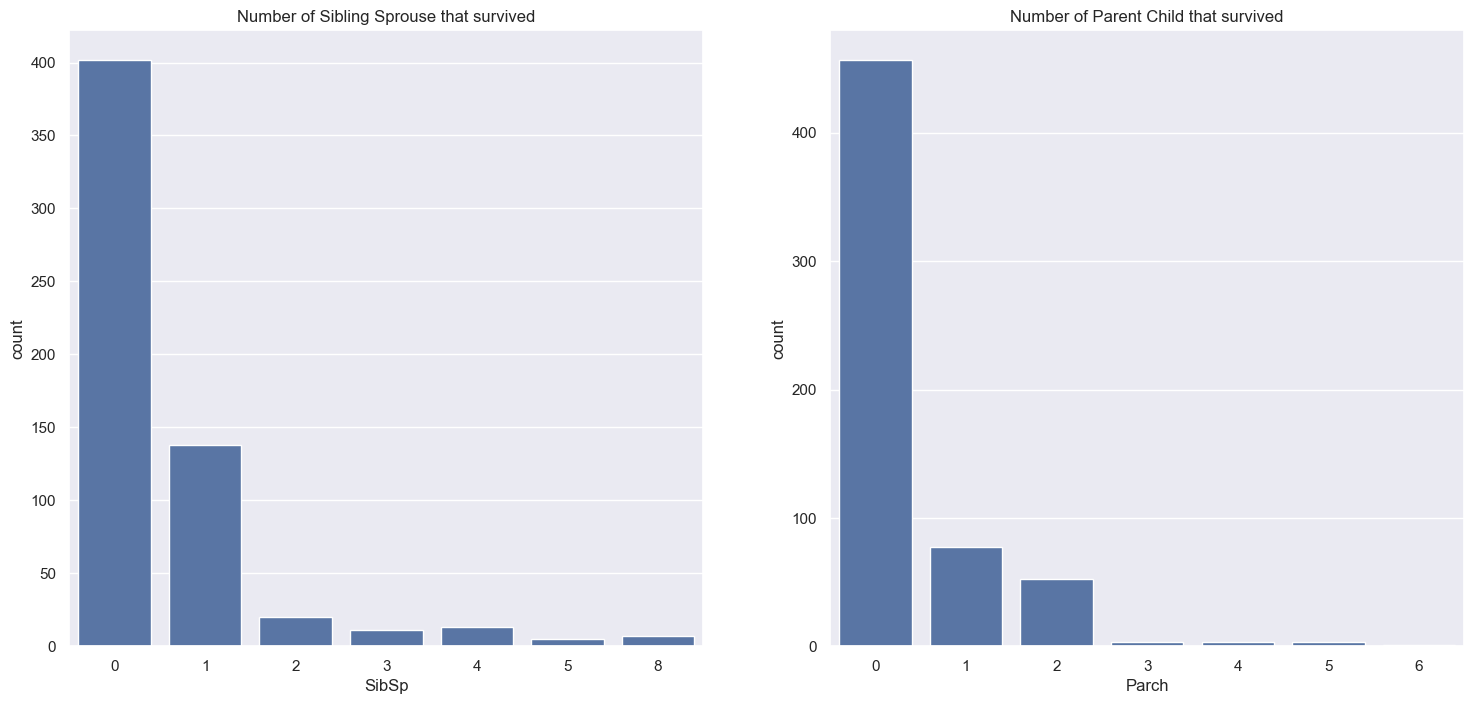

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='SibSp', data=titanic_train, ax=axes[0]).set(title='Number of Sibling Sprouse that survived')
sns.countplot(x='Parch', data=titanic_train, ax=axes[1]).set(title='Number of Parent Child that survived')


In [27]:
klib.corr_mat(data=titanic_train)

C:\Users\juelb\Desktop\DecisionTreeOnTitanic\environ\Lib\site-packages\klib\describe.py:271: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return corr.style.applymap(color_negative_red).format("{:.2f}", na_rep="-")


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,0.00,-0.05,0.02,-0.08,0.00,0.02
Survived,0.00,1.00,-0.31,-0.06,-0.05,0.07,0.24
Pclass,-0.05,-0.31,1.00,-0.36,0.10,0.04,-0.52
Age,0.02,-0.06,-0.36,1.00,-0.32,-0.18,0.09
SibSp,-0.08,-0.05,0.10,-0.32,1.00,0.45,0.16
Parch,0.00,0.07,0.04,-0.18,0.45,1.00,0.21
Fare,0.02,0.24,-0.52,0.09,0.16,0.21,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

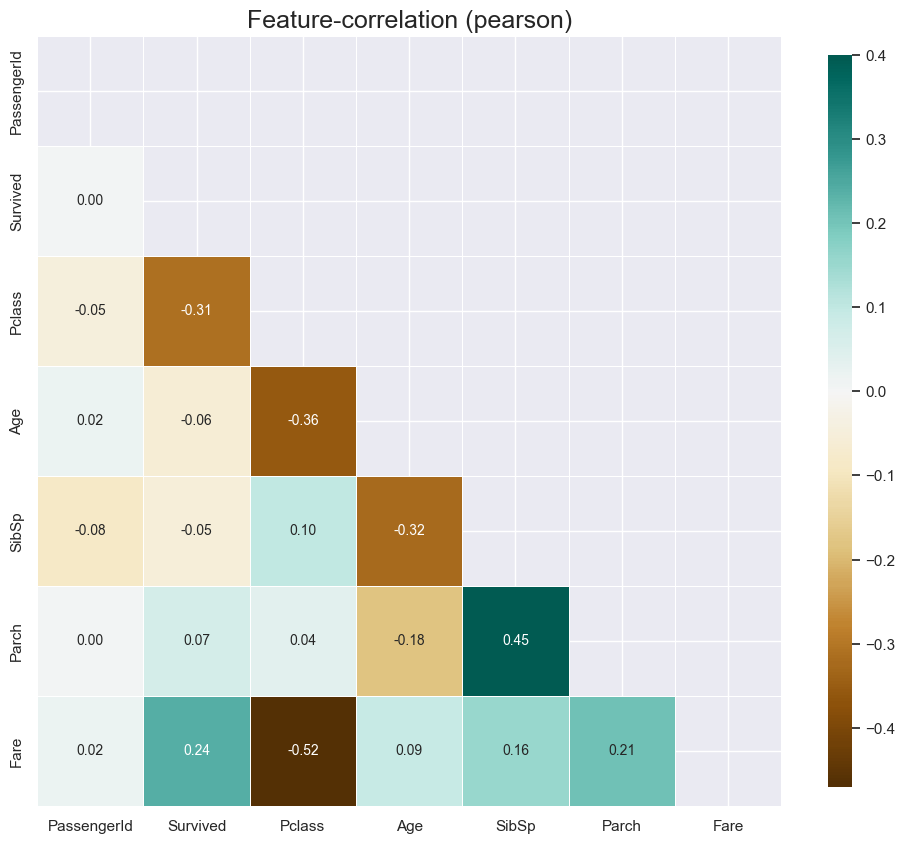

In [28]:
klib.corr_plot(data=titanic_train)

In [29]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [30]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(30.0, 60.0]"
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,NaN
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,"(18.0, 30.0]"
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,"(18.0, 30.0]"
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,"(18.0, 30.0]"


In [31]:
titanic_train.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
age_category    category
dtype: object

In [32]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
features_name = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target_name =  ['Survived']

In [34]:
X_train = titanic_train[features_name]
y_train = titanic_train[target_name]

In [35]:
categorical_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numerical_features = ['Age', 'Fare']

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaling', StandardScaler())
])

full_transformer = ColumnTransformer([
    ('numerical_trans', numerical_transformer, numerical_features),
    ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [38]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         118
SibSp         0
Parch         0
Fare          0
Embarked      1
dtype: int64

In [39]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,1,male,54.0,0,0,51.8625,S
718,3,male,NaN,0,0,15.5000,Q
685,2,male,25.0,1,2,41.5792,C
73,3,male,26.0,1,0,14.4542,C
882,3,female,22.0,0,0,10.5167,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,NaN,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


In [40]:
prepared_data = full_transformer.fit_transform(X_train)
prepared_data

<596x25 sparse matrix of type '<class 'numpy.float64'>'
	with 4172 stored elements in Compressed Sparse Row format>

In [41]:
prepared_data.toarray().shape

(596, 25)

In [42]:
tree_clf = DecisionTreeClassifier()

In [43]:
tree_clf.fit(X=prepared_data, y=y_train)

DecisionTreeClassifier()

In [44]:
print('Training Score is {:.2f}%'.format(tree_clf.score(prepared_data, y_train) * 100))

Training Score is 97.99%


In [45]:
cross_val_score(estimator=tree_clf, X=prepared_data, y=y_train, cv=5, n_jobs=-1)

array([0.75      , 0.73109244, 0.70588235, 0.75630252, 0.75630252])

In [46]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2,40,1),
    'min_samples_split' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'splitter' : ['best', 'random']
}

In [47]:
grid_search = GridSearchCV(estimator=tree_clf, param_grid=param_grid, cv=5, n_jobs=-1)

In [48]:
grid_search.fit(prepared_data, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [49]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=5,
                       min_samples_split=5, splitter='random')

In [50]:
best_tree = grid_search.best_estimator_
best_tree.fit(prepared_data, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=21, min_samples_leaf=5,
                       min_samples_split=5, splitter='random')

In [51]:
best_tree.score(prepared_data, y_train)

0.8406040268456376

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
y_pred = best_tree.predict(prepared_data)

In [54]:
confusion_matrix(y_true=y_train, y_pred=y_pred)

array([[350,  24],
       [ 71, 151]], dtype=int64)

In [55]:
print(classification_report(y_true=y_train, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       374
           1       0.86      0.68      0.76       222

    accuracy                           0.84       596
   macro avg       0.85      0.81      0.82       596
weighted avg       0.84      0.84      0.84       596



### Testing with the Test Data

In [56]:
prepared_test_data = full_transformer.transform(titanic_test[features_name])

In [57]:
y_pred = best_tree.predict(prepared_test_data)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [58]:
y_test = titanic_test['Survived']

In [59]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       175
           1       0.84      0.64      0.73       120

    accuracy                           0.80       295
   macro avg       0.81      0.78      0.79       295
weighted avg       0.81      0.80      0.80       295



In [60]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[160,  15],
       [ 43,  77]], dtype=int64)

In [61]:
import joblib

In [62]:
joblib.dump(value=full_transformer, filename='model/full_transformer.pickle')
joblib.dump(value=best_tree, filename='model/tree_clf.pickle')

['model/tree_clf.pickle']

In [63]:
!ls

Decision Tree Assignment.ipynb
environ
main.py
model
Procfile
README.md
requirements.txt
Sample File
static
templates
test.csv


In [64]:
df = pd.read_csv('test.csv')

In [65]:
features_name = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [66]:
df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
1,101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
2,102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
3,103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
4,104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
5,105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
6,106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
7,107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
8,108,109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S
9,109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q


In [67]:
df = df[features_name]
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,female,28.0,0,0,7.8958,S
1,3,male,NaN,0,0,7.8958,S
2,1,male,21.0,0,1,77.2875,S
3,3,male,33.0,0,0,8.6542,S
4,3,male,37.0,2,0,7.9250,S
5,3,male,28.0,0,0,7.8958,S
6,3,female,21.0,0,0,7.6500,S
7,3,male,NaN,0,0,7.7750,S
8,3,male,38.0,0,0,7.8958,S
9,3,female,NaN,1,0,24.1500,Q


In [68]:
full_transformer2 = joblib.load('model/full_transformer.pickle')

In [69]:
prepared_data2 = full_transformer2.transform(df)
prepared_data2

<50x25 sparse matrix of type '<class 'numpy.float64'>'
	with 350 stored elements in Compressed Sparse Row format>

In [70]:
tree_clf2 = joblib.load('model/tree_clf.pickle')

tree_clf2.predict(prepared_data2)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [71]:
prepared_data2.shape

(50, 25)

In [72]:
!ls

Decision Tree Assignment.ipynb
environ
main.py
model
Procfile
README.md
requirements.txt
Sample File
static
templates
test.csv


In [74]:
!pip freeze > requirements.txt